# WeatherPy
----

### Analysis
* As the absolute value of the latitude decreases, the temperature tends to increase. There is a -0.85 correlation coefficient of temperature vs the absolute value of the latitude (the trend is not linear).
* There is no strong relationship between latitude and cloudiness. There seems to be a quantized reading for most cities as there are stong bands of humidities.
* There is no strong relationship between latitude and wind speed. However, the northern hemisphere does have a group of higher windspeeds that are not reached by the southern hemisphere.

Limitations:
The free version of the API supports current weather readings, so all longitudes are included at a single timepoint. This can cause variations in the temperature (and other readings) as some locations are daytime and other locations are nighttime. A paid version of the API allows min/max daily temperature readings, which would make the analysis better. It would also be good to have historical data so that each city could be averaged to remove noisy data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
# https://github.com/wingchen/citipy
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("Assets", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

day = time.strftime("%m/%d/%Y")

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# https://openweathermap.org/current
import openweathermapy.core as owm
import json

settings = {"units": "imperial", "appid": api_key}
summary = ["name", "sys.country", "main.temp", "clouds.all", "wind.speed", "coord.lat", "coord.lon", "main.humidity"]

weather_data = []

print('Beginning Data Retrieval')
print('-'*30)
i = 0
for city in cities:
    try:
        current_weather = owm.get_current(city, **settings)
        data = current_weather(*summary)
        weather_data.append(data)
        # limited to 60 calls per minute
        time.sleep(1)
        i += 1
        print(f"Processing Record {i}: {city.title()}")
    except:
        print(f"{city.title()} not found. Skipping...")
        # make sure rate limit not reached
        time.sleep(1)
        
print('-'*30)
print(f'Data Retrieval Complete. {i} records found')
print('-'*30)

Beginning Data Retrieval
------------------------------
Processing Record 1: Bredasdorp
Processing Record 2: Busselton
Processing Record 3: Geraldton
Processing Record 4: Rikitea
Processing Record 5: Tuatapere
Processing Record 6: Sazonovo
Processing Record 7: New Norfolk
Processing Record 8: Araouane
Processing Record 9: Albany
Processing Record 10: Saldanha
Processing Record 11: Atuona
Processing Record 12: Lircay
Processing Record 13: Mar Del Plata
Processing Record 14: Ushuaia
Processing Record 15: Caravelas
Processing Record 16: Ilulissat
Processing Record 17: Mahebourg
Taolanaro not found. Skipping...
Processing Record 18: Cape Town
Processing Record 19: Coihaique
Processing Record 20: Clyde River
Processing Record 21: Batesville
Processing Record 22: Hermanus
Belushya Guba not found. Skipping...
Processing Record 23: College
Processing Record 24: Bathsheba
Processing Record 25: Codrington
Processing Record 26: Chokurdakh
Processing Record 27: Luau
Processing Record 28: Dikson
Pr

Processing Record 228: Puno
Processing Record 229: Pula
Tumannyy not found. Skipping...
Processing Record 230: Lazurne
Processing Record 231: Dingle
Processing Record 232: Daru
Processing Record 233: Hailar
Processing Record 234: Ormara
Processing Record 235: East London
Processing Record 236: Tamworth
Processing Record 237: Kimbe
Processing Record 238: Vila Velha
Processing Record 239: Paradise
Processing Record 240: Haines Junction
Processing Record 241: Cabo San Lucas
Processing Record 242: Mwandiga
Processing Record 243: Mayumba
Processing Record 244: Jamnagar
Processing Record 245: Broken Hill
Processing Record 246: Westport
Processing Record 247: Thunder Bay
Processing Record 248: Huarmey
Processing Record 249: El Alto
Processing Record 250: San Patricio
Processing Record 251: Ereymentau
Sentyabrskiy not found. Skipping...
Processing Record 252: Porto Novo
Processing Record 253: Tuburan
Processing Record 254: Kiruna
Processing Record 255: Ilebo
Processing Record 256: Beringovskiy

Processing Record 458: Qasigiannguit
Toliary not found. Skipping...
Processing Record 459: Aparecida Do Taboado
Processing Record 460: Kiunga
Processing Record 461: Cocorit
Processing Record 462: Hillsboro
Felidhoo not found. Skipping...
Processing Record 463: Sokoni
Processing Record 464: Praia Da Vitoria
Processing Record 465: Nioki
Processing Record 466: Lasem
Processing Record 467: Forssa
Processing Record 468: Anqiu
Processing Record 469: Rokupr
Processing Record 470: Excelsior Springs
Processing Record 471: Eenhana
Processing Record 472: San Juan
Shchelyayur not found. Skipping...
Processing Record 473: Guiberoua
Processing Record 474: Aneho
Processing Record 475: Zyryanka
Processing Record 476: Soyo
Processing Record 477: Devils Lake
Processing Record 478: Grand Forks
El Faiyum not found. Skipping...
Tatawin not found. Skipping...
Processing Record 479: Krieglach
Processing Record 480: Nizhniy Kuranakh
Processing Record 481: Alenquer
Processing Record 482: Rocky Mountain House
P

### Convert Raw Data to DataFrame

In [4]:
df = pd.DataFrame(weather_data)
df.columns = ["City", "Country", "Temperature (F)", "Cloudiness", "Wind Speed", 
              "Latitude", "Longitude", "Humidity"]
df = df.set_index('City')

# save df to .csv
df.to_csv(output_data_file)

df.head()

,Country,Temperature (F),Cloudiness,Wind Speed,Latitude,Longitude,Humidity
City,,,,,,,
Bredasdorp,ZA,73.40,92,11.41,-34.53,20.04,64
Busselton,AU,64.93,0,12.10,-33.64,115.35,100
Geraldton,CA,3.20,90,12.75,49.72,-86.95,71
Rikitea,PF,80.41,76,14.00,-23.12,-134.97,96
Tuatapere,NZ,53.50,0,11.43,-46.13,167.69,100


### Plotting the Data

#### Latitude vs. Temperature Plot

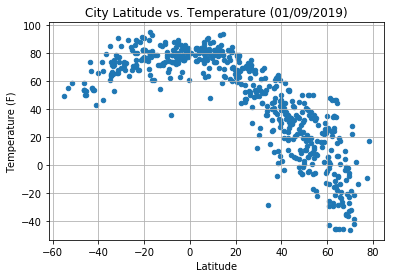

In [5]:
df.plot.scatter(x='Latitude', y='Temperature (F)');
plt.grid();
plt.title(f'City Latitude vs. Temperature ({day})');

save_path = os.path.join('Assets', 'latitude_vs_temperature.png')
plt.savefig(save_path)

#### Latitude vs. Humidity Plot

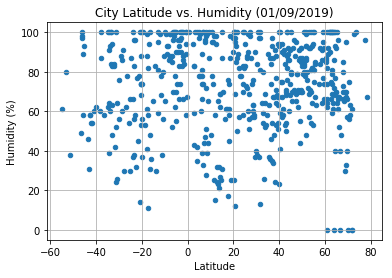

In [6]:
df.plot.scatter(x='Latitude', y='Humidity');
plt.grid();
plt.title(f'City Latitude vs. Humidity ({day})');
plt.ylabel('Humidity (%)');
plt.ylim([-5, 105]);

save_path = os.path.join('Assets', 'latitude_vs_humidity.png')
plt.savefig(save_path)

#### Latitude vs. Cloudiness Plot

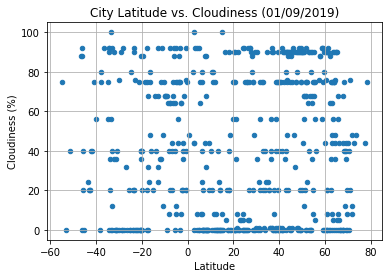

In [7]:
df.plot.scatter(x='Latitude', y='Cloudiness');
plt.grid();
plt.title(f'City Latitude vs. Cloudiness ({day})');
plt.ylabel('Cloudiness (%)');

save_path = os.path.join('Assets', 'latitude_vs_cloudiness.png')
plt.savefig(save_path)

#### Latitude vs. Wind Speed Plot

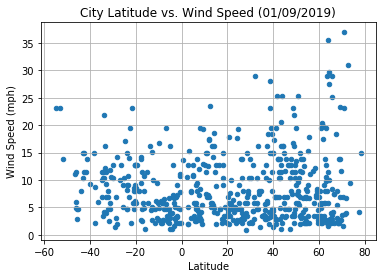

In [8]:
df.plot.scatter(x='Latitude', y='Wind Speed');
plt.grid();
plt.title(f'City Latitude vs. Wind Speed ({day})');
plt.ylabel('Wind Speed (mph)');

save_path = os.path.join('Assets', 'latitude_vs_wind_speed.png')
plt.savefig(save_path)

In [9]:
corr_df = df.loc[:, ["Temperature (F)", "Cloudiness", "Wind Speed", "Humidity"]]
abs_lat = np.absolute(df.loc[:, 'Latitude'])
corr_df['Latitude'] = abs_lat
corr_df.head()

,Temperature (F),Cloudiness,Wind Speed,Humidity,Latitude
City,,,,,
Bredasdorp,73.40,92,11.41,64,34.53
Busselton,64.93,0,12.10,100,33.64
Geraldton,3.20,90,12.75,71,49.72
Rikitea,80.41,76,14.00,96,23.12
Tuatapere,53.50,0,11.43,100,46.13


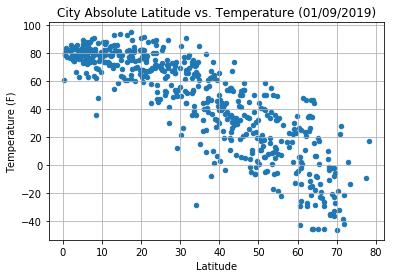

In [10]:
corr_df.plot.scatter(x='Latitude', y='Temperature (F)');
plt.grid();
plt.title(f'City Absolute Latitude vs. Temperature ({day})');

save_path = os.path.join('Assets', 'absolute_latitude_vs_temperature.png')
plt.savefig(save_path)

In [11]:
correlation = corr_df.corr()
correlation

,Temperature (F),Cloudiness,Wind Speed,Humidity,Latitude
Temperature (F),1.000000,0.004824,0.096396,0.067674,-0.849678
Cloudiness,0.004824,1.000000,0.127192,0.375879,0.074551
Wind Speed,0.096396,0.127192,1.000000,0.050599,0.142841
Humidity,0.067674,0.375879,0.050599,1.000000,-0.060620
Latitude,-0.849678,0.074551,0.142841,-0.060620,1.000000


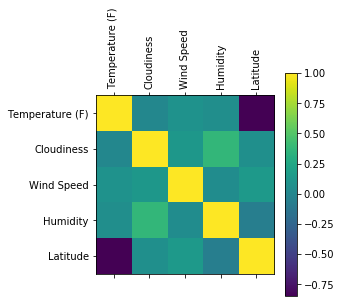

In [12]:
plt.matshow(correlation);
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90);
plt.yticks(range(len(correlation.columns)), correlation.columns);
plt.colorbar();

save_path = os.path.join('Assets', 'correlation_matrix.png')
plt.savefig(save_path)